# Random Forest Classification with Normalizer

This Code template is for the Classification tasks using a simple RandomForestClassifier based on the Ensemble Learning technique and feature rescaling technique Normalize. It is a meta estimator that fits multiple decision trees and uses averaging to improve the predictive accuracy and control over-fitting.

### Required Packages

In [31]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,Normalizer
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [32]:
#filepath
file_path= ""

List of features which are  required for model training .

In [33]:
#x_values
features=[]

Target feature for prediction.

In [34]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [35]:
df=pd.read_csv(file_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [36]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [37]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [38]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

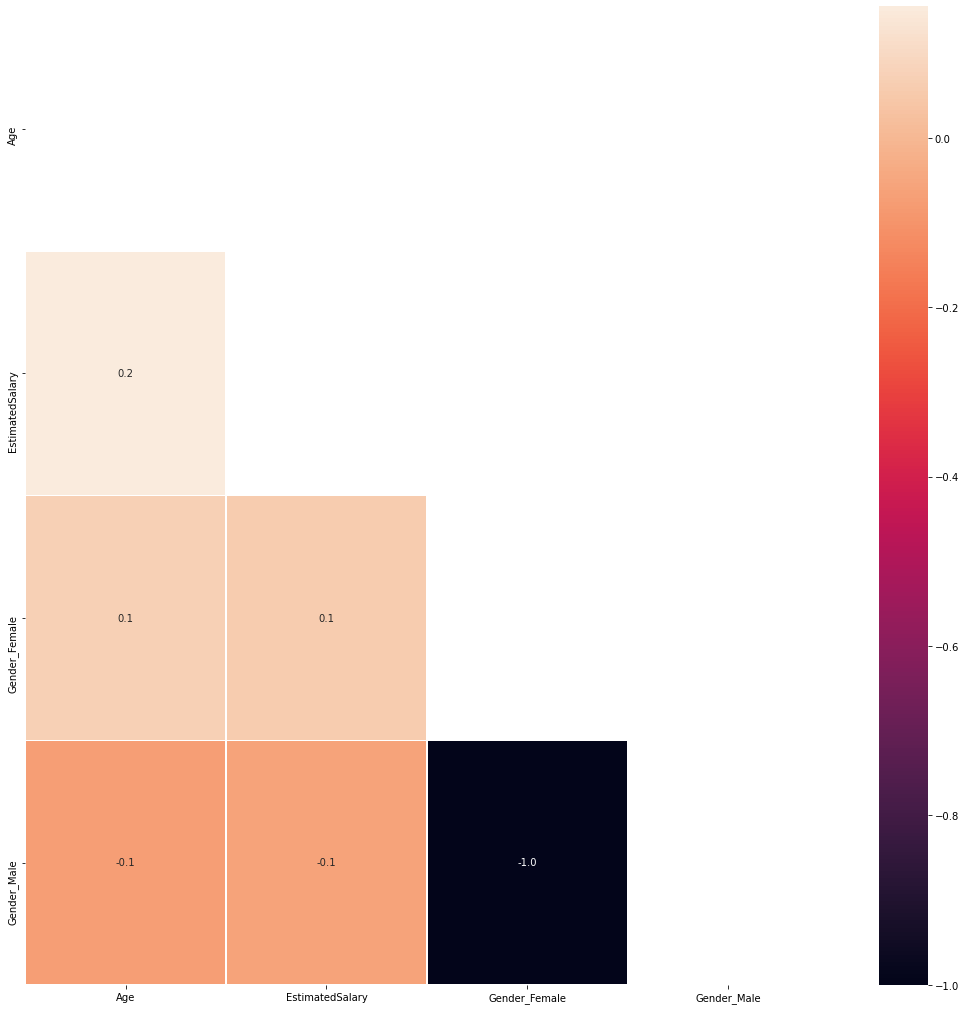

In [39]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

<AxesSubplot:xlabel='Purchased', ylabel='count'>

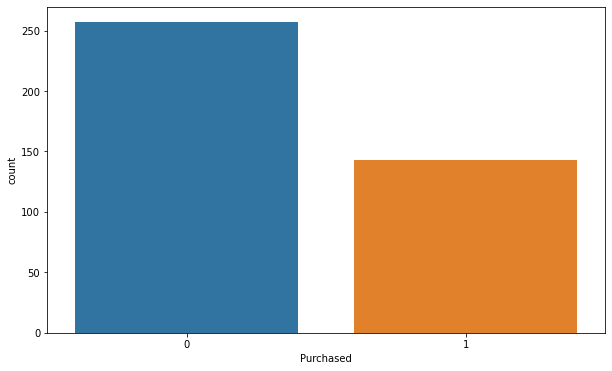

In [40]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)#performing datasplitting

### Feature Rescaling:

Scale input vectors individually to unit norm (vector length).
[For more information click here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)

In [42]:
normalize = Normalizer()
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

### Model

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the <code>max_samples</code> parameter if <code>bootstrap=True</code> (default), otherwise the whole dataset is used to build each tree.

#### Model Tuning Parameters

    1. n_estimators : int, default=100
> The number of trees in the forest.

    2. criterion : {â€œginiâ€, â€œentropyâ€}, default=â€giniâ€
> The function to measure the quality of a split. Supported criteria are â€œginiâ€ for the Gini impurity and â€œentropyâ€ for the information gain.

    3. max_depth : int, default=None
> The maximum depth of the tree.

    4. max_features : {â€œautoâ€, â€œsqrtâ€, â€œlog2â€}, int or float, default=â€autoâ€
> The number of features to consider when looking for the best split:

    5. bootstrap : bool, default=True
> Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

    6. oob_score : bool, default=False
> Whether to use out-of-bag samples to estimate the generalization accuracy.

    7. n_jobs : int, default=None
> The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. <code>None</code> means 1 unless in a joblib.parallel_backend context. <code>-1</code> means using all processors. See Glossary for more details.

    8. random_state : int, RandomState instance or None, default=None
> Controls both the randomness of the bootstrapping of the samples used when building trees (if <code>bootstrap=True</code>) and the sampling of the features to consider when looking for the best split at each node (if <code>max_features < n_features</code>).

    9. verbose : int, default=0
> Controls the verbosity when fitting and predicting.

In [43]:
# Build Model here
model = RandomForestClassifier(n_jobs = -1,random_state = 123)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=123)

#### Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [44]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 82.50 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

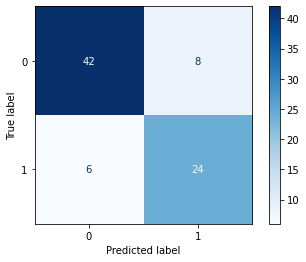

In [45]:
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [46]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        50
           1       0.75      0.80      0.77        30

    accuracy                           0.82        80
   macro avg       0.81      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



#### Feature Importances.

The Feature importance refers to techniques that assign a score to features based on how useful they are for making the prediction.

(-1.0, 4.0)

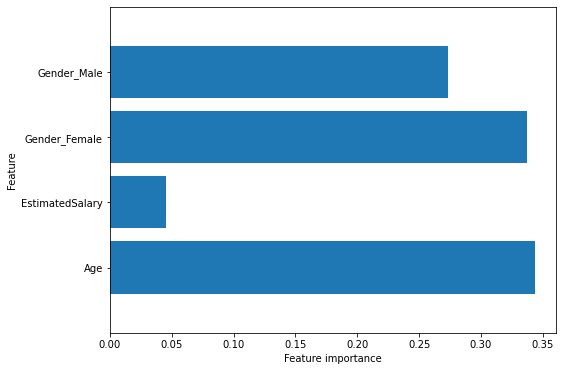

In [47]:
plt.figure(figsize=(8,6))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

#### Creator: Neel Pawar, Github: [Profile]( https://github.com/neel-ntp)